### Occupancy

##### Data Abstract:
Experimental data used for binary classification (room occupancy) from Temperature,Humidity,Light and CO2. Ground-truth occupancy was obtained from time stamped pictures that were taken every minute.

####   Data Description
    1. date time year-month-day hour:minute:second
    2. Temperature, in Celsius
    3. Relative Humidity, %
    4. Light, in Lux
    5. CO2, in ppm
    6. Humidity Ratio, Derived quantity from temperature and relative humidity, in kgwater-vapor/kg-air
    7. Occupancy, 0 or 1, 0 for not occupied, 1 for occupied status

In [53]:
# Importing Necessary libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from scipy.stats import uniform, truncnorm, randint

In [2]:
data = pd.read_csv("datatraining.txt") # Data Reading

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8143 entries, 1 to 8143
Data columns (total 7 columns):
date             8143 non-null object
Temperature      8143 non-null float64
Humidity         8143 non-null float64
Light            8143 non-null float64
CO2              8143 non-null float64
HumidityRatio    8143 non-null float64
Occupancy        8143 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 508.9+ KB


In [4]:
data.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


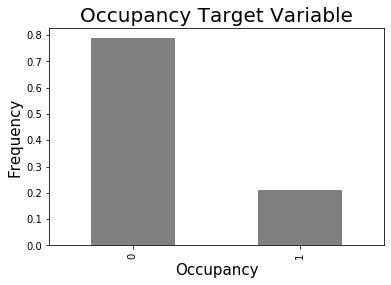

In [5]:
# Checking target balance 
data.Occupancy.value_counts(normalize=True).plot(kind='bar',color='gray')
plt.xlabel("Occupancy",fontsize=15)
plt.ylabel("Frequency",fontsize = 15)
plt.title("Occupancy Target Variable",fontsize=20)
plt.show()

In [6]:
data['Occupancy'].value_counts()

0    6414
1    1729
Name: Occupancy, dtype: int64

Data is Imablanced from the above graph we can see that.

In [7]:
data.shape  # Shape : 8143 rows and 7 attributes

(8143, 7)

In [8]:
data.isna().sum() # Checking Na Values

date             0
Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
Occupancy        0
dtype: int64

In [9]:
#################### Under Sampling ###########################
# class count
count_value_0, count_value_1 = data['Occupancy'].value_counts()
# Separate class
class_0_data = data[data['Occupancy'] == 0]
class_1_data = data[data['Occupancy'] == 1]

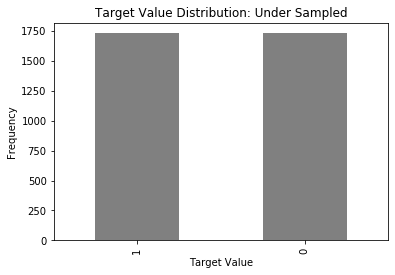

In [10]:
temp_under = class_0_data.sample(count_value_1, replace=False)
under_sample_data = pd.concat([temp_under, class_1_data], axis=0)
under_sample_data['Occupancy'].value_counts().plot(kind='bar', title='Target Value Distribution: Under Sampled',color='gray')
plt.xlabel("Target Value")
plt.ylabel("Frequency")
plt.show()

In [13]:
X = under_sample_data.drop(['Occupancy','date'],1) # Independent Variables
y = under_sample_data.Occupancy # Dependent Variables

In [14]:
X.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio
count,3458.000000,3458.000000,3458.000000,3458.000000,3458.000000
mean,21.006743,26.249142,244.099759,762.945057,0.004043
std,1.025248,5.803574,226.184645,396.438190,0.000940
min,19.000000,16.790000,0.000000,416.333333,0.002682
25%,20.200000,20.890000,0.000000,446.000000,0.003282
50%,21.100000,26.290000,393.666667,619.500000,0.003892
75%,21.890000,31.100000,454.000000,985.250000,0.004620
max,23.180000,39.117500,744.000000,2028.500000,0.006476


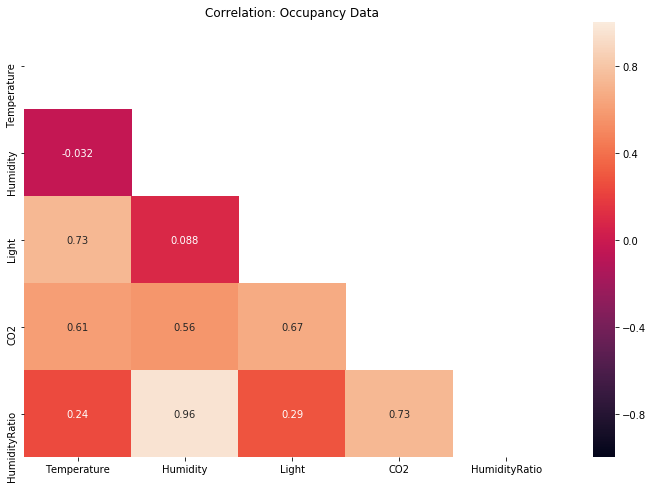

In [15]:
plt.figure(figsize=(12,8))
mask = np.triu(np.ones_like(X.corr()))
sns_plot = sns.heatmap(X.corr(),annot=True,vmax = 1, vmin = -1,mask = mask)
plt.title("Correlation: Occupancy Data")
fig = sns_plot.get_figure()
fig.savefig("occupancy_correlation.jpg")
plt.show()

In [16]:
standard_scaler = StandardScaler() # Scaling feature

X = standard_scaler.fit_transform(X)

In [17]:
# Splitting into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [18]:
random_cfs = RandomForestClassifier(random_state=0) # Random Forest Classifier

In [19]:
random_cfs.fit(X_train,y_train) # Fitting the Model

D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [20]:
y_pred = random_cfs.predict(X_test) # Predicting on test dataset

In [21]:
print(classification_report(y_test,y_pred)) # Classification report

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       594
           1       0.99      0.99      0.99       548

    accuracy                           0.99      1142
   macro avg       0.99      0.99      0.99      1142
weighted avg       0.99      0.99      0.99      1142



In [22]:
cm = confusion_matrix(y_test,y_pred)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

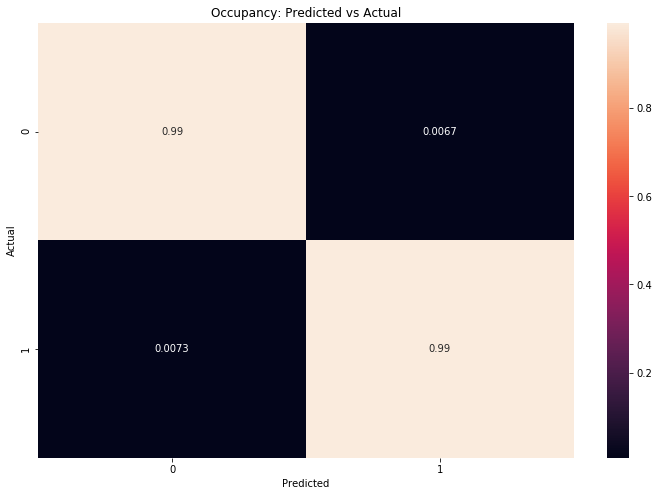

In [23]:
plt.figure(figsize=(12,8))
sns_plot = sns.heatmap(cm,annot=True,cbar=True)
plt.title("Occupancy: Predicted vs Actual")
plt.xlabel("Predicted")
plt.ylabel("Actual")
fig = sns_plot.get_figure()
fig.savefig("RandomForestClassifier_occupancy.jpg")
plt.show()

In [24]:
print("Random Forest Classifier accuracy: {0} %".format(round(accuracy_score(y_test,y_pred),4)*100)) # Test Accuracy

Random Forest Classifier accuracy: 99.3 %


In [25]:
### Over sampling

In [26]:
#################### Over Sampling ###########################
# class count
count_value_0, count_value_1 = data['Occupancy'].value_counts()
# Separate class
class_0_data = data[data['Occupancy'] == 0]
class_1_data = data[data['Occupancy'] == 1]

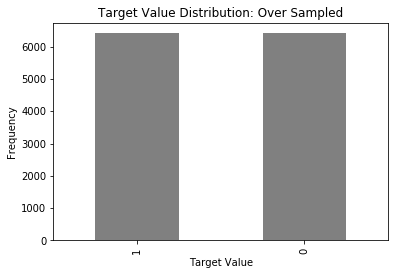

In [27]:
temp_over = class_1_data.sample(count_value_0, replace=True)
over_sample_data = pd.concat([temp_over, class_0_data], axis=0)
over_sample_data['Occupancy'].value_counts().plot(kind='bar', title='Target Value Distribution: Over Sampled',color='gray')
plt.xlabel("Target Value")
plt.ylabel("Frequency")
plt.show()

In [28]:
X = over_sample_data.drop(['Occupancy','date'],1) # Independent Variables
y = over_sample_data.Occupancy # Dependent Variables

In [29]:
X.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio
count,12828.000000,12828.000000,12828.000000,12828.000000,12828.000000
mean,21.001468,26.201761,243.831245,760.661606,0.004034
std,1.025294,5.788923,227.064245,395.567094,0.000939
min,19.000000,16.745000,0.000000,412.750000,0.002674
25%,20.200000,20.890000,0.000000,446.000000,0.003282
50%,21.100000,26.290000,396.500000,614.250000,0.003866
75%,21.890000,31.000000,454.000000,966.333333,0.004589
max,23.180000,39.117500,1546.333333,2028.500000,0.006476


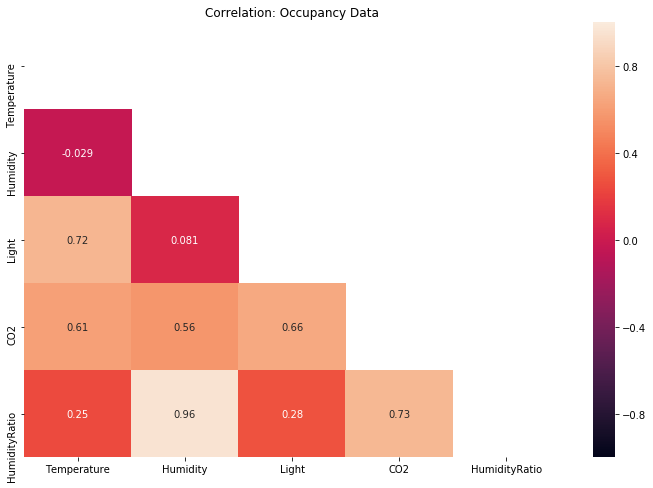

In [30]:
plt.figure(figsize=(12,8))
mask = np.triu(np.ones_like(X.corr()))
sns_plot = sns.heatmap(X.corr(),annot=True,vmax = 1, vmin = -1,mask = mask)
plt.title("Correlation: Occupancy Data")
fig = sns_plot.get_figure()
fig.savefig("occupancy_correlation.jpg")
plt.show()

In [31]:
standard_scaler = StandardScaler() # Scaling feature

X = standard_scaler.fit_transform(X)

In [32]:
# Splitting into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [33]:
random_cfs = RandomForestClassifier(random_state=0) # Random Forest Classifier

In [34]:
random_cfs.fit(X_train,y_train) # Fitting the Model

D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [35]:
y_pred = random_cfs.predict(X_test) # Predicting on test dataset

In [36]:
print(classification_report(y_test,y_pred)) # Classification report

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      2096
           1       0.99      1.00      1.00      2138

    accuracy                           1.00      4234
   macro avg       1.00      1.00      1.00      4234
weighted avg       1.00      1.00      1.00      4234



In [37]:
cm = confusion_matrix(y_test,y_pred)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

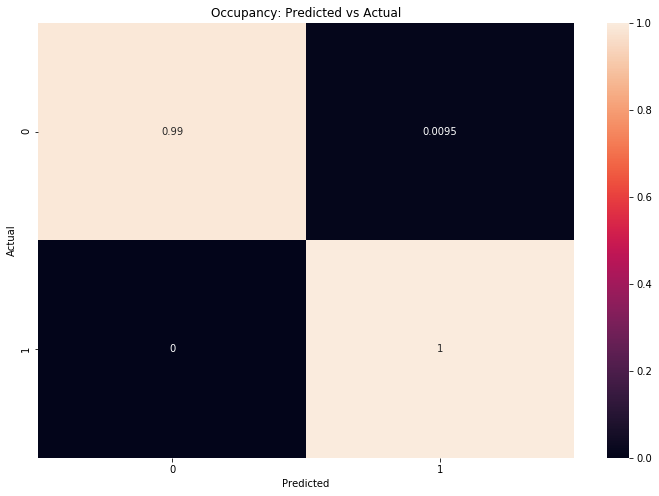

In [38]:
plt.figure(figsize=(12,8))
sns_plot = sns.heatmap(cm,annot=True,cbar=True)
plt.title("Occupancy: Predicted vs Actual")
plt.xlabel("Predicted")
plt.ylabel("Actual")
fig = sns_plot.get_figure()
fig.savefig("RandomForestClassifier_occupancy.jpg")
plt.show()

In [39]:
print("Random Forest Classifier accuracy: {0} %".format(round(accuracy_score(y_test,y_pred),4)*100)) # Test Accuracy

Random Forest Classifier accuracy: 99.53 %


### Submodel

In [40]:
X_train_new = pd.DataFrame(X_train,columns=under_sample_data.drop(["Occupancy","date"],1).columns) #New Data Preparation
X_test_new = pd.DataFrame(X_test,columns=under_sample_data.drop(["Occupancy","date"],1).columns) # For test 

pred_prob = random_cfs.predict_proba(X_train_new) # Calculating the Probabilities

# Creating New Target Variables for Multiclass Decision Tree
X_train_new['class_0'] =pred_prob[:,0]
X_train_new['class_1'] =pred_prob[:,1]
X_train_new['new_y'] = X_train_new[['class_0','class_1']].astype('str').agg('-'.join, axis=1)
X_train_new.drop(['class_0','class_1'],1,inplace=True)
pred_prob = random_cfs.predict_proba(X_test)

d_tree = DecisionTreeClassifier() # Decision Tree Classifier

# Data Preparation for Test Data
X_test_new['class_0'] =pred_prob[:,0]
X_test_new['class_1'] =pred_prob[:,1]
X_test_new['new_y'] = X_test_new[['class_0','class_1']].astype('str').agg('-'.join, axis=1)
X_test_new.drop(['class_0','class_1'],1,inplace=True)

# Label Encoding on training and testing data
for feature in X_train_new.columns:
    coder = LabelEncoder()
    X_train_new[feature]=coder.fit_transform(X_train_new[feature])

for feature in X_train_new.columns:
    coder = LabelEncoder()
    X_test_new[feature]=coder.fit_transform(X_test_new[feature])

### Feature Scaling for training and testing data
scaler = StandardScaler()

X = scaler.fit_transform(X_train_new.drop('new_y',1))

d_tree.fit(X,X_train_new.new_y) ## Fitting Decision tree classifier

scaler = StandardScaler()

x = scaler.fit_transform(X_test_new.drop('new_y',1))

d_pred = d_tree.predict(x) # Predicting Decision Tree Classifier

# print(classification_report(X_test_new.new_y,d_pred)) # Classification Report of New Multiclass CLassifier

accuracy_score(X_test_new.new_y.values,d_pred) # Accuracy of multiclass

d_tree.score(X,X_train_new.new_y)

#### Hyper Parameter tunning

In [47]:
## Parameters for Hyper Parameter Tunning
criterion=['gini', 'entropy']
max_depth=[i for i in range (2,100,5)]
min_samples_leaf=[i for i in range (2,20,2)]
splitter = ["best", "random"]
model_params = {
    # normally distributed max_features, with mean .25 stddev 0.1, bounded between 0 and 1
    'max_features': truncnorm(a=0, b=1, loc=0.25, scale=0.1),
    # uniform distribution from 0.01 to 0.2 (0.01 + 0.199)
    'min_samples_split': uniform(0.01, 0.199),
    'min_samples_leaf':min_samples_leaf,
    'criterion':criterion,
    'splitter':splitter,
    'max_depth':max_depth
}

In [48]:
clf = RandomizedSearchCV(DecisionTreeClassifier(), model_params, n_iter=100, cv=5, random_state=1)
model = clf.fit(X,X_train_new.new_y)

D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [49]:
clf.best_params_

{'criterion': 'entropy',
 'max_depth': 92,
 'max_features': 0.2814776125834009,
 'min_samples_leaf': 18,
 'min_samples_split': 0.018865823830407583,
 'splitter': 'best'}

In [50]:
clf.best_score_ # Accuracy of Best Parameters

0.9872003723528043

## Decision Tree for Binary Classification

In [51]:
# Creating New Decision Tree classifier on base dataset.
new_d_tree = DecisionTreeClassifier(**clf.best_params_)

new_d_tree.fit(X_train,y_train)

new_d_tree.score(X_train,y_train)

new_d_tree.score(X_test,y_test) # 

0.9773264052905054

### Raisin:

##### Abstract
Images of the Kecimen and Besni raisin varieties were obtained with CVS. A total of 900 raisins were used, including 450 from both varieties, and 7 morphological features were extracted.

    1.) Area: Gives the number of pixels within the boundaries of the raisin. 
    2.) Perimeter: It measures the environment by calculating the distance between the boundaries of the raisin and the pixels around it.
    3.) MajorAxisLength: Gives the length of the main axis, which is the longest line that can be drawn on the raisin.
    4.) MinorAxisLength: Gives the length of the small axis, which is the shortest line that can be drawn on the raisin.
    5.) Eccentricity: It gives a measure of the eccentricity of the ellipse, which has the same moments as raisins. 
    6.) ConvexArea: Gives the number of pixels of the smallest convex shell of the region formed by the raisin.
    7.) Extent: Gives the ratio of the region formed by the raisin to the total pixels in the bounding box.
    8.) Class: Kecimen and Besni raisin.

In [60]:
data = pd.read_excel("Raisin_Dataset/Raisin_Dataset.xlsx") # Reading Excel file

In [61]:
data.shape #data has 900 rows and 8 features

(900, 8)

In [62]:
data.info() # Data Types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
Area               900 non-null int64
MajorAxisLength    900 non-null float64
MinorAxisLength    900 non-null float64
Eccentricity       900 non-null float64
ConvexArea         900 non-null int64
Extent             900 non-null float64
Perimeter          900 non-null float64
Class              900 non-null object
dtypes: float64(5), int64(2), object(1)
memory usage: 56.3+ KB


In [63]:
data.isna().sum() # Checking NA Values

Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Class              0
dtype: int64

In [64]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Area,900.0,87804.127778,39002.111390,25387.000000,59348.000000,78902.000000,105028.250000,235047.000000
MajorAxisLength,900.0,430.929950,116.035121,225.629541,345.442898,407.803951,494.187014,997.291941
MinorAxisLength,900.0,254.488133,49.988902,143.710872,219.111126,247.848409,279.888575,492.275279
Eccentricity,900.0,0.781542,0.090318,0.348730,0.741766,0.798846,0.842571,0.962124
ConvexArea,900.0,91186.090000,40769.290132,26139.000000,61513.250000,81651.000000,108375.750000,278217.000000
Extent,900.0,0.699508,0.053468,0.379856,0.670869,0.707367,0.734991,0.835455
Perimeter,900.0,1165.906636,273.764315,619.074000,966.410750,1119.509000,1308.389750,2697.753000


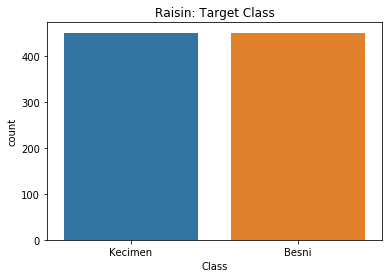

In [65]:
sns.countplot(data.Class) # Class Target Variable
plt.title("Raisin: Target Class")
plt.show()

In [66]:
label_encoder = LabelEncoder()
data['Class']=label_encoder.fit_transform(data['Class']) # Label Encoder

In [67]:
X = data.drop('Class',1) # Independent Variable
y = data['Class'] # Dependent Variable

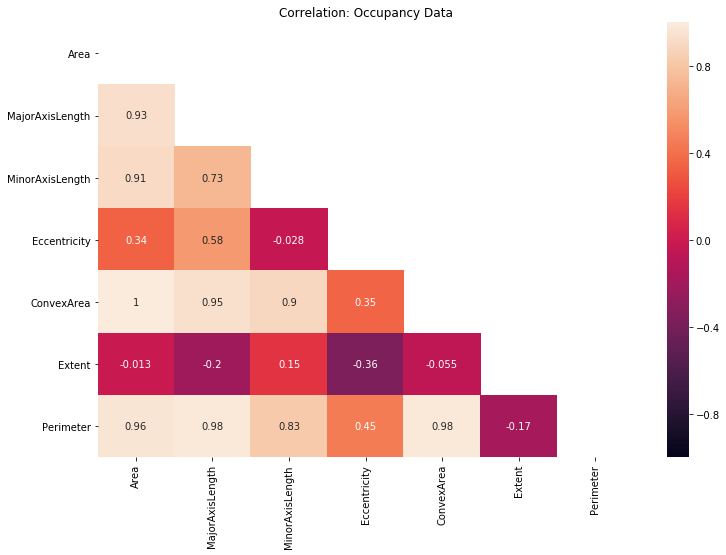

In [68]:
plt.figure(figsize=(12,8))
mask = np.triu(np.ones_like(X.corr()))
sns_plot = sns.heatmap(X.corr(),annot=True,vmax = 1, vmin = -1,mask = mask)
plt.title("Correlation: Occupancy Data")
fig = sns_plot.get_figure()
fig.savefig("raisin_correlation.jpg")
plt.show()

In [69]:
Standard_Scaler = StandardScaler() # Scaler

In [70]:
X = Standard_Scaler.fit_transform(X) 

In [71]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

## Modeling : Random Forest

In [72]:
random_cfs = RandomForestClassifier(random_state=40)  # Random Forest

In [73]:
random_cfs.fit(X_train,y_train) # Model Fit

D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=40, verbose=0,
                       warm_start=False)

In [74]:
y_pred = random_cfs.predict(X_test) # Prediction

In [75]:
print(classification_report(y_test,y_pred)) # Classification Report

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       144
           1       0.85      0.79      0.82       153

    accuracy                           0.82       297
   macro avg       0.82      0.82      0.82       297
weighted avg       0.82      0.82      0.82       297



In [76]:
cm = confusion_matrix(y_test,y_pred)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

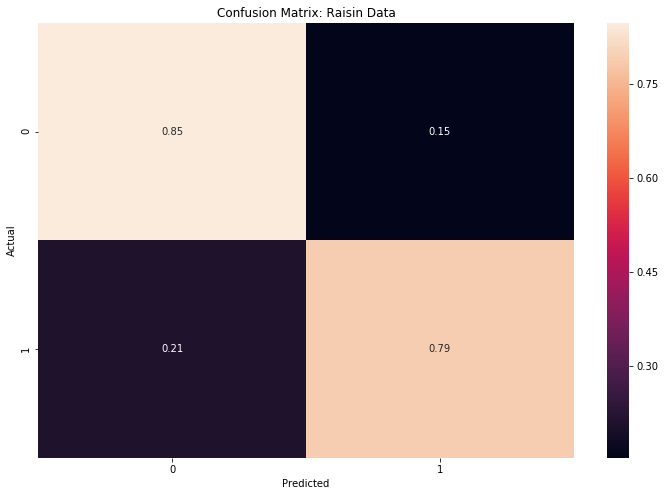

In [179]:
plt.figure(figsize=(12,8))
sns_plot = sns.heatmap(cm,annot=True)
plt.title("Confusion Matrix: Raisin Data")
plt.xlabel("Predicted")
plt.ylabel("Actual")
fig = sns_plot.get_figure()
fig.savefig("random_forest_classifier_raisin.png")
plt.show()

In [78]:
print(confusion_matrix(y_test,y_pred)) # Confusion Matrix

[[122  22]
 [ 32 121]]


In [79]:
print(accuracy_score(y_test,y_pred)) # Test Accuracy

0.8181818181818182


In [80]:
random_cfs.score(X_train,y_train) # Train Accuracy

0.9834162520729685

### Decision Tree: Multiclass Dataset

In [81]:
X_train_new = pd.DataFrame(X_train,columns=data.drop("Class",1).columns) # Data Preparation
X_test_new = pd.DataFrame(X_test,columns=data.drop("Class",1).columns) 

In [82]:
# Preparing Data for Multiclass Decision Tree
pred_prob = random_cfs.predict_proba(X_train_new)

X_train_new['class_0'] =pred_prob[:,0]
X_train_new['class_1'] =pred_prob[:,1]



X_train_new['new_y'] = X_train_new[['class_0','class_1']].astype('str').agg('-'.join, axis=1)

X_train_new.drop(['class_0','class_1'],1,inplace=True)

pred_prob = random_cfs.predict_proba(X_test)

X_test_new['class_0'] =pred_prob[:,0]
X_test_new['class_1'] =pred_prob[:,1]



X_test_new['new_y'] = X_test_new[['class_0','class_1']].astype('str').agg('-'.join, axis=1)

X_test_new.drop(['class_0','class_1'],1,inplace=True)
# Label Encoding for Training and testing 
for feature in X_train_new.columns:
    coder = LabelEncoder()
    X_train_new[feature]=coder.fit_transform(X_train_new[feature])

for feature in X_train_new.columns:
    coder = LabelEncoder()
    X_test_new[feature]=coder.fit_transform(X_test_new[feature])
# Feature Scaling
Standard_Scaler = StandardScaler()

X = Standard_Scaler.fit_transform(X_train_new.drop('new_y',1))

d_tree = DecisionTreeClassifier() # Decision Tree classifier

d_tree.fit(X,X_train_new.new_y)

Standard_Scaler = StandardScaler()

x = Standard_Scaler.fit_transform(X_test_new.drop('new_y',1))

d_pred = d_tree.predict(x) 

In [84]:
print(classification_report(X_test_new.new_y,d_pred)) # Classification report for Multiclass

              precision    recall  f1-score   support

           0       0.57      0.85      0.68        59
           1       0.41      0.32      0.36        38
           2       0.20      0.18      0.19        17
           3       0.12      0.05      0.07        19
           4       0.00      0.00      0.00        10
           5       0.00      0.00      0.00        11
           6       0.00      0.00      0.00         9
           7       0.14      0.18      0.16        11
           8       0.12      0.08      0.10        12
           9       0.18      0.17      0.17        24
          10       0.77      0.91      0.84        87

    accuracy                           0.51       297
   macro avg       0.23      0.25      0.23       297
weighted avg       0.44      0.51      0.47       297



In [85]:
accuracy_score(X_test_new.new_y.values,d_pred) # Accuracy on Testing Data

0.5117845117845118

In [86]:
d_tree.score(X,X_train_new.new_y)

1.0

### Hyper Parameter Tunning

In [87]:
clf = RandomizedSearchCV(DecisionTreeClassifier(), model_params, n_iter=100, cv=50, random_state=1)
model = clf.fit(X,X_train_new.new_y)

D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 6 members, which is too few. The minimum number of members in any class cannot be less than n_splits=50.
  % (min_groups, self.n_splits)), Warning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [88]:
clf.best_params_

{'criterion': 'entropy',
 'max_depth': 57,
 'max_features': 0.3161577490440254,
 'min_samples_leaf': 12,
 'min_samples_split': 0.039204422272605496,
 'splitter': 'best'}

In [89]:
clf.best_score_ # Accuracy after Hyperparameter tunning

0.6533996683250415

### Decision Tree : Binary Classification

In [90]:
new_d_tree = DecisionTreeClassifier(**clf.best_params_) # Using Best Parameter 

new_d_tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=57,
                       max_features=0.3161577490440254, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12,
                       min_samples_split=0.039204422272605496,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [91]:
new_d_tree.score(X_train,y_train)

0.8855721393034826

In [92]:
new_d_tree.score(X_test,y_test) # Testing Accuracy on Best Parameter Decision Tree on Base Data

0.8047138047138047

# Audit Data

##### Abstract:
Exhaustive one year non-confidential data in the year 2015 to 2016 of firms is collected from the Auditor Office of India to build a predictor for classifying suspicious firms.

Many risk factors are examined from various areas like past records of audit office, audit-paras, environmental conditions reports, firm reputation summary, on-going issues report, profit-value records, loss-value records, follow-up reports etc. After in-depth interview with the auditors, important risk factors are evaluated and their probability of existence is calculated from the present and past records.

In [93]:
train_data = pd.read_csv("audit_data/audit_risk.csv")

In [94]:
train_data.isna().sum() # Na Values

Sector_score      0
LOCATION_ID       0
PARA_A            0
Score_A           0
Risk_A            0
PARA_B            0
Score_B           0
Risk_B            0
TOTAL             0
numbers           0
Score_B.1         0
Risk_C            0
Money_Value       1
Score_MV          0
Risk_D            0
District_Loss     0
PROB              0
RiSk_E            0
History           0
Prob              0
Risk_F            0
Score             0
Inherent_Risk     0
CONTROL_RISK      0
Detection_Risk    0
Audit_Risk        0
Risk              0
dtype: int64

In [95]:
train_data.Risk.value_counts() # Target Imbalance

0    471
1    305
Name: Risk, dtype: int64

In [96]:
train_data.dropna(inplace=True)

In [97]:
train_data.describe() # Univariate Analysis

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
count,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,...,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.0,775.000000,775.000000
mean,20.138877,2.453059,0.351484,1.352712,10.813924,0.313290,6.342181,13.235241,5.067742,0.223742,...,0.519226,0.104516,0.216774,0.053677,2.703484,17.701560,0.572903,0.5,7.177034,0.393548
std,24.301417,5.681977,0.174082,3.442348,50.114461,0.169865,30.091403,51.343841,0.264608,0.080399,...,0.290468,0.531360,0.068028,0.306027,0.859106,54.772482,0.444825,0.0,38.691674,0.488852
min,1.850000,0.000000,0.200000,0.000000,0.000000,0.200000,0.000000,0.000000,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,2.000000,1.400000,0.400000,0.5,0.280000,0.000000
25%,2.370000,0.210000,0.200000,0.042000,0.000000,0.200000,0.000000,0.540000,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,2.000000,1.584000,0.400000,0.5,0.316800,0.000000
50%,3.890000,0.880000,0.200000,0.176000,0.410000,0.200000,0.082000,1.370000,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,2.400000,2.214000,0.400000,0.5,0.556000,0.000000
75%,55.570000,2.480000,0.600000,1.488000,4.160000,0.400000,1.887000,7.725000,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,3.300000,10.703000,0.400000,0.5,3.252600,1.000000
max,59.850000,85.000000,0.600000,51.000000,1264.630000,0.600000,758.778000,1268.910000,9.000000,0.600000,...,2.400000,9.000000,0.600000,5.400000,5.200000,801.262000,5.800000,0.5,961.514400,1.000000


In [114]:
X_1 = train_data.drop(['Risk','LOCATION_ID'],1) # Independent Feature
y = train_data.Risk # Dependent Feature

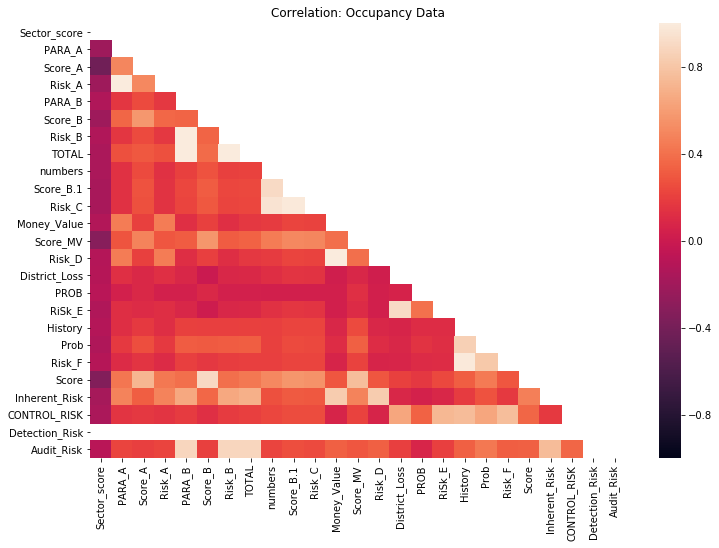

In [116]:
plt.figure(figsize=(12,8))
mask = np.triu(np.ones_like(X_1.corr()))
sns_plot = sns.heatmap(X_1.corr(),vmax = 1, vmin = -1,mask = mask)
plt.title("Correlation: Occupancy Data")
fig = sns_plot.get_figure()
fig.savefig("audit_correlation.jpg")
plt.show()

In [117]:
scaler = StandardScaler() # Scaler

In [118]:
X = scaler.fit_transform(X_1)

In [119]:
# Splitting the Data
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

In [120]:
rf_model = RandomForestClassifier(random_state=40) # Random Forest

In [121]:
rf_model.fit(X_train,y_train)

D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=40, verbose=0,
                       warm_start=False)

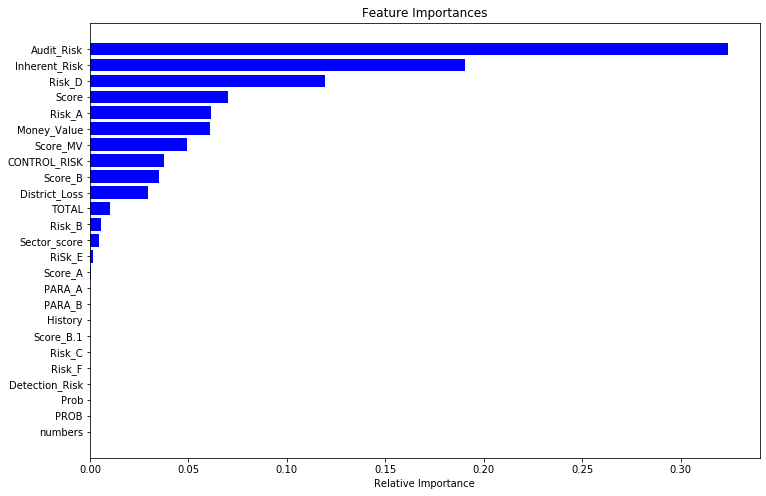

In [130]:
features = X_1.columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize =(12,8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.savefig('foo.png',dpi=400)
plt.show()

In [144]:
new_temp = X_1.iloc[: , indices[0:13]]

In [146]:
scaler = StandardScaler() # Scaler

X = scaler.fit_transform(new_temp)

# Splitting the Data
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

rf_model = RandomForestClassifier(random_state=40) # Random Forest

rf_model.fit(X_train,y_train)

In [151]:
y_pred = rf_model.predict(X_test)

In [152]:
print(classification_report(y_test,y_pred)) # Classification Report

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       157
           1       0.93      0.92      0.92        99

    accuracy                           0.94       256
   macro avg       0.94      0.94      0.94       256
weighted avg       0.94      0.94      0.94       256



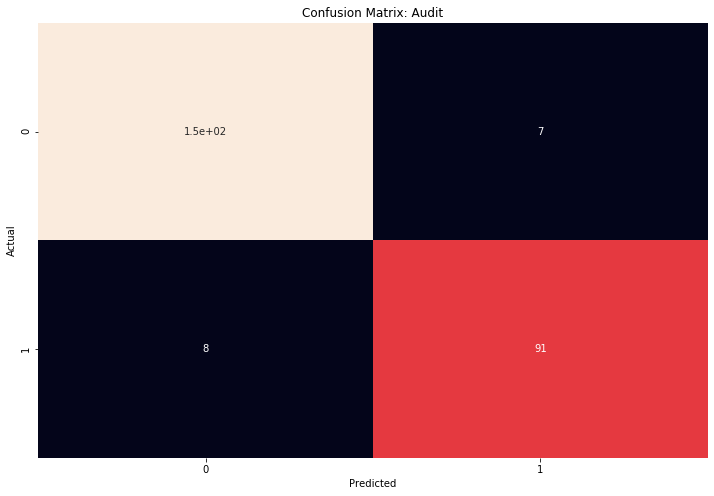

In [178]:
plt.figure(figsize=(12,8))
sns_plot = sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cbar=False)
plt.title("Confusion Matrix: Audit")
plt.xlabel("Predicted")
plt.ylabel("Actual")
fig = sns_plot.get_figure()
fig.savefig("confusion_matrix_audit.png")
plt.show()

In [154]:
print(confusion_matrix(y_test,y_pred)) # Confusion Matrix

[[150   7]
 [  8  91]]


In [155]:
print(accuracy_score(y_test,y_pred)) # Test Accuracy

0.94140625


In [156]:
rf_model.score(X_train,y_train) # Training Accuracy

0.9903660886319846

In [158]:
## Decision Tree

In [162]:
# Data Preparation
X_train_new = pd.DataFrame(X_train,columns=new_temp.columns)
X_test_new = pd.DataFrame(X_test,columns=new_temp.columns)

In [163]:
pred_prob = rf_model.predict_proba(X_train_new)

X_train_new['class_0'] =pred_prob[:,0]
X_train_new['class_1'] =pred_prob[:,1]



X_train_new['new_y'] = X_train_new[['class_0','class_1']].astype('str').agg('-'.join, axis=1)

X_train_new.drop(['class_0','class_1'],1,inplace=True)

pred_prob = rf_model.predict_proba(X_test)

X_test_new['class_0'] =pred_prob[:,0]
X_test_new['class_1'] =pred_prob[:,1]



X_test_new['new_y'] = X_test_new[['class_0','class_1']].astype('str').agg('-'.join, axis=1)

X_test_new.drop(['class_0','class_1'],1,inplace=True)

# Label Encoder
for feature in X_train_new.columns:
    coder = LabelEncoder()
    X_train_new[feature]=coder.fit_transform(X_train_new[feature])

for feature in X_train_new.columns:
    coder = LabelEncoder()
    X_test_new[feature]=coder.fit_transform(X_test_new[feature])

# Standard Scaler
scaler = StandardScaler()

X = scaler.fit_transform(X_train_new.drop('new_y',1))

In [164]:
d_tree = DecisionTreeClassifier(random_state=40) # Decision Tree

### Decision Tree : Multiclass Classification

In [165]:
d_tree.fit(X,X_train_new.new_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=40, splitter='best')

In [166]:
scaler = StandardScaler()

x = scaler.fit_transform(X_test_new.drop('new_y',1)) # Scaling Test Data

In [167]:
d_pred = d_tree.predict(x)

In [168]:
print(classification_report(X_test_new.new_y,d_pred)) # Classification Report 

              precision    recall  f1-score   support

           0       0.77      0.94      0.84        63
           1       0.00      0.00      0.00        15
           2       0.15      0.15      0.15        13
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         4
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         4
          10       0.20      0.07      0.10        15
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00        19
          13       0.39      0.08      0.13       111
          14       0.00      0.00      0.00         0

    accuracy                           0.28       256
   macro avg       0.10      0.08      0.08       256
weighted avg       0.38   

D:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [169]:
accuracy_score(X_test_new.new_y.values,d_pred) # Accuracy before parameter tunning on Multiclass Decision Tree

0.27734375

In [170]:
d_tree.score(X,X_train_new.new_y)

1.0

### Hyper Parameter Tunning

In [171]:
clf = RandomizedSearchCV(DecisionTreeClassifier(), model_params, n_iter=100, cv=50, random_state=1)
model = clf.fit(X,X_train_new.new_y)

D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=50.
  % (min_groups, self.n_splits)), Warning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [172]:
clf.best_params_

{'criterion': 'gini',
 'max_depth': 97,
 'max_features': 0.2733008407663235,
 'min_samples_leaf': 2,
 'min_samples_split': 0.05057733882139125,
 'splitter': 'best'}

In [173]:
clf.best_score_

0.7649325626204239

### Decision Tree: Binary Classification

In [174]:
new_d_tree = DecisionTreeClassifier(**clf.best_params_,random_state=40) # Using Best Parameters

In [175]:
new_d_tree.fit(X_train,y_train) # Fitting Model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=97,
                       max_features=0.2733008407663235, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2,
                       min_samples_split=0.05057733882139125,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=40, splitter='best')

In [176]:
new_d_tree.score(X_train,y_train)

0.9171483622350675

In [177]:
new_d_tree.score(X_test,y_test) # Testing Data Accuracy

0.890625